# **BANK LOAN ANALYSIS REPORT**

## **1. METADATA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
df=pd.read_excel("/content/drive/MyDrive/FTU2/LT (Python)/financial_loan_data_excel.xlsx")

In [4]:
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [5]:
df.shape

(38576, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [7]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## **2. ANALYSIS**

### **2.1. DASHBOARD 1: SUMMARY**

**2.1.1. KPIs**

**Loan Applications**

In [8]:
# Total Loan Applications
total_loan_applications = df['id'].count()
print("Total Loan Applications:", total_loan_applications)

Total Loan Applications: 38576


In [9]:
# MTD Total Loan Applications
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")

MTD Loan Applications (for December 2021): 4314


In [10]:
# MoM Total Loan Applications
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_month = 12
    prev_year = latest_year - 1
else:
    prev_month = latest_month - 1
    prev_year = latest_year

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()
pmtd_data = df [(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]
pmtd_loan_applications = pmtd_data['id'].count()

if pmtd_loan_applications > 0: mom_change = (mtd_loan_applications - pmtd_loan_applications) / pmtd_loan_applications * 100
else: mom_change = None

print(f"MoM Total Loan Applications: {mom_change:.2f}%" if mom_change is not None else "MoM Change: N/A")

MoM Total Loan Applications: 6.91%


**Funded Amount**

In [11]:
# Total Funded Amount
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/ 1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


In [12]:
# MTD Total Funded Amount
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


In [13]:
# MoM Total Funded Amount
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_month = 12
    prev_year = latest_year - 1
else:
    prev_month = latest_month - 1
    prev_year = latest_year

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
pmtd_data = df [(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]
pmtd_total_funded_amount = pmtd_data['loan_amount'].sum()

if pmtd_total_funded_amount > 0: mom_change = (mtd_total_funded_amount - pmtd_total_funded_amount) / pmtd_total_funded_amount * 100
else: mom_change = None

print(f"MoM Total Funded Amount: {mom_change:.2f}%" if mom_change is not None else "MoM Change: N/A")

MoM Total Funded Amount: 13.04%


**Amount Received**

In [37]:
# Total Amount Received
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received/1000000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))

Total Amount Received: $473.07M


In [15]:
# MTD Total Amount Received
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total Amount Received: ${:.2f}M".format(mtd_total_amount_received_millions))

MTD Total Amount Received: $58.07M


In [16]:
# MoM Total Amount Received
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_month = 12
    prev_year = latest_year - 1
else:
    prev_month = latest_month - 1
    prev_year = latest_year

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
pmtd_data = df [(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]
pmtd_total_amount_received = pmtd_data['total_payment'].sum()

if pmtd_total_amount_received > 0: mom_change = (mtd_total_amount_received - pmtd_total_amount_received) / pmtd_total_amount_received * 100
else: mom_change = None

print(f"MoM Total Amount Received: {mom_change:.2f}%" if mom_change is not None else "MoM Change: N/A")

MoM Total Amount Received: 15.84%


**Interest Rate**

In [17]:
# Average Interest Rate
average_interest_rate= df['int_rate'].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


In [18]:
# MTD Interest Rate
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_interest_rate = mtd_data['int_rate'].mean()*100

print(f"MTD Average Interest Rate: {mtd_average_interest_rate:.2f}%")

MTD Average Interest Rate: 12.36%


In [19]:
# MoM Interest Rate
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_month = 12
    prev_year = latest_year - 1
else:
    prev_month = latest_month - 1
    prev_year = latest_year

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_interest_rate = mtd_data['int_rate'].mean()
pmtd_data = df [(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]
pmtd_average_interest_rate = pmtd_data['int_rate'].mean()


if pmtd_average_interest_rate > 0: mom_change = (mtd_average_interest_rate - pmtd_average_interest_rate) / pmtd_average_interest_rate * 100
else: mom_change = None

print(f"MoM Interest Rate: {mom_change:.2f}%" if mom_change is not None else "MoM Change: N/A")

MoM Interest Rate: 3.47%


**Debt-to-Income Ratio (DTI)**

In [20]:
# Average DTI
average_dti= df['dti'].mean()*100
print("Average DTI: {:.2f}%".format(average_dti))

Average DTI: 13.33%


In [21]:
# MTD DTI
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_dti = mtd_data['dti'].mean()*100

print(f"MTD Average Interest Rate: {mtd_average_dti:.2f}%")

MTD Average Interest Rate: 13.67%


In [22]:
# MoM DTI
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_month = 12
    prev_year = latest_year - 1
else:
    prev_month = latest_month - 1
    prev_year = latest_year

mtd_data = df [(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_average_dti = mtd_data['dti'].mean()
pmtd_data = df [(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]
pmtd_average_dti = pmtd_data['dti'].mean()


if pmtd_average_dti > 0: mom_change = (mtd_average_dti - pmtd_average_dti) / pmtd_average_dti * 100
else: mom_change = None

print(f"MoM DTI: {mom_change:.2f}%" if mom_change is not None else "MoM Change: N/A")

MoM DTI: 2.73%


**2.1.2. Good vs Bad Loan**

In [36]:
df['loan_quality'] = df['loan_status'].map(lambda x: 'Good Loan' if x in ['Current', 'Fully Paid'] else 'Bad Loan')
result = (
    df.groupby('loan_quality')
    .agg(
        Total_Loan_Applications=('id', 'count'),
        Percentage_of_Total_Loan_Applications = ('id', lambda x: (x.count() / total_loan_applications) * 100),
        Total_Funded_Amount=('loan_amount', 'sum'),
        Total_Amount_Received=('total_payment', 'sum')
        )
    .reset_index()
)
print(result)

  loan_quality  Total_Loan_Applications  \
0     Bad Loan                     5333   
1    Good Loan                    33243   

   Percentage_of_Total_Loan_Applications  Total_Funded_Amount  \
0                              13.824658             65532225   
1                              86.175342            370224850   

   Total_Amount_Received  
0               37284763  
1              435786170  


**2.1.3. Loan Status**

In [25]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

df['is_mtd'] = (df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)

result = (
    df
    .groupby('loan_status')
    .agg(
        Total_Loan_Applications=('id', 'count'),
        Total_Funded_Amount=('loan_amount', 'sum'),
        MTD_Funded_Amount=('loan_amount', lambda x: x[df.loc[x.index, 'is_mtd']].sum()),
        Total_Amount_Received=('total_payment', 'sum'),
        MTD_Amount_Received=('total_payment', lambda x: x[df.loc[x.index, 'is_mtd']].sum()),
        Avg_Interest_Rate=('int_rate', 'mean'),
        Avg_DTI=('dti', 'mean')
    )
    .reset_index()
)

print(result)

   loan_status  Total_Loan_Applications  Total_Funded_Amount  \
0  Charged Off                     5333             65532225   
1      Current                     1098             18866500   
2   Fully Paid                    32145            351358350   

   MTD_Funded_Amount  Total_Amount_Received  MTD_Amount_Received  \
0            8732775               37284763              5324211   
1            3946625               24199914              4934318   
2           41302025              411586256             47815851   

   Avg_Interest_Rate   Avg_DTI  
0           0.138786  0.140047  
1           0.150993  0.147243  
2           0.116411  0.131674  


### **2.2. DASHBOARD 2: OVERVIEW**

**2.2.1. Monthly Trends by Issue Date**

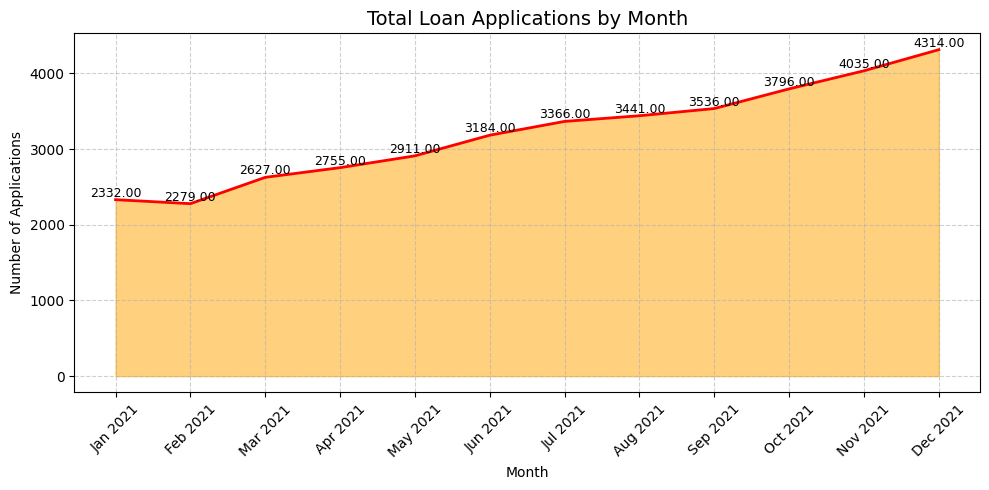

In [26]:
# Total Loan Applications
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='red', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.1, f"{row['loan_applications_count']:.2f}", ha='center',  va='bottom', fontsize=9, rotation=0, color='black')
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks (ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

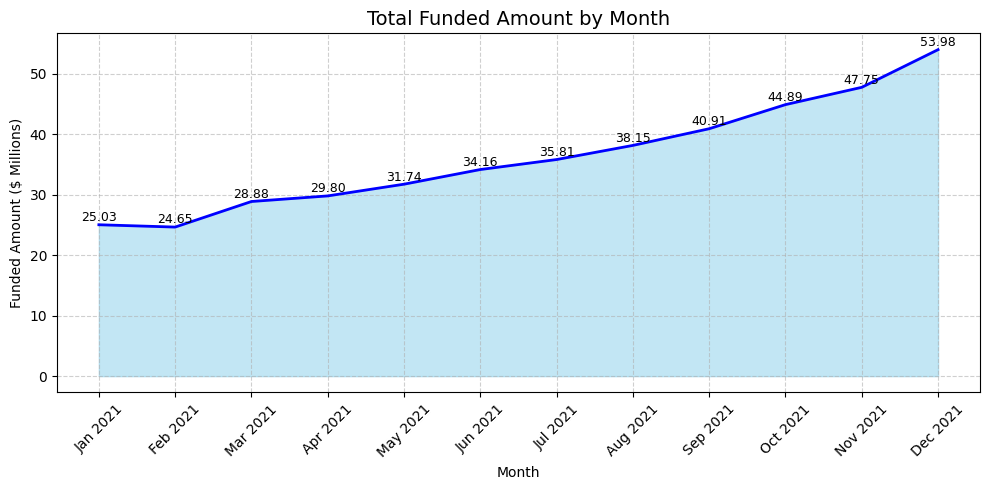

In [27]:
# Total Funded Amount
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}", ha='center',  va='bottom', fontsize=9, rotation=0, color='black')
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks (ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

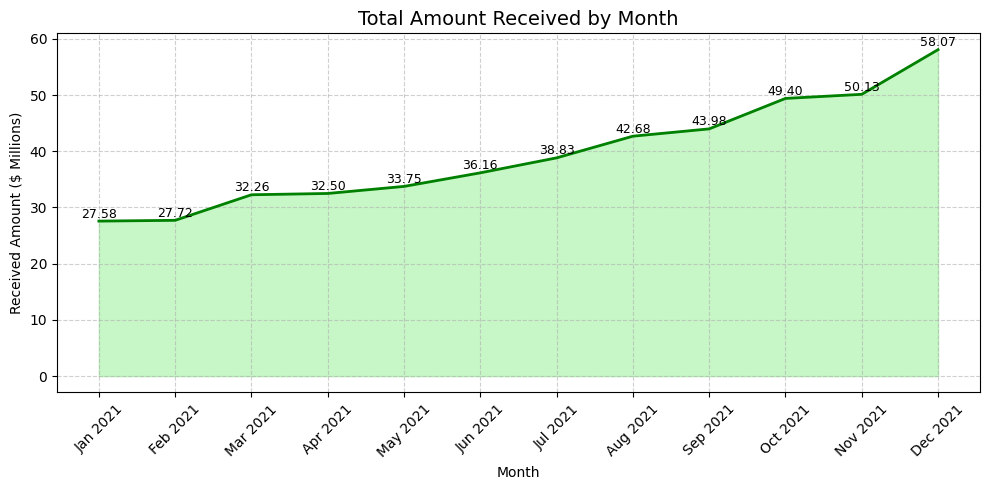

In [28]:
# Total Amount Received
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'], color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'], color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}", ha='center',  va='bottom', fontsize=9, rotation=0, color='black')
plt.title('Total Amount Received by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks (ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2.2.2. Regional Analysis by State**

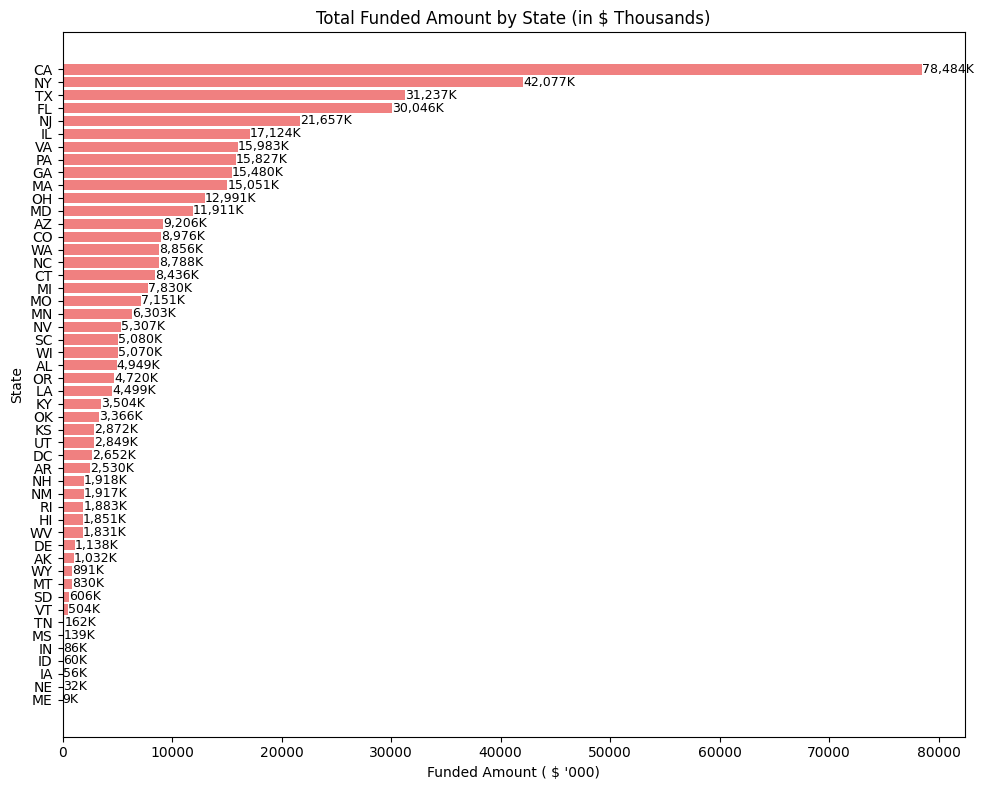

In [29]:
# Total Funded Amount (do the same for Total Loan Applications and Total Amount Received)
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}K', va='center', fontsize=9)
plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount ( $ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

**2.2.3. Loan Term Analysis**

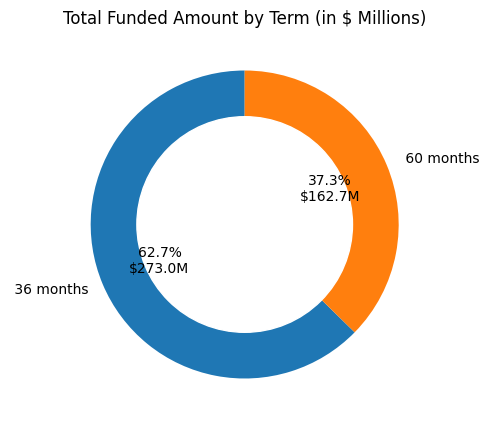

In [30]:
# Total Funded Amount (do the same for Total Loan Applications and Total Amount Received)
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5, 5))
plt.pie(
  term_funding_millions,
  labels=term_funding_millions.index,
  autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
  startangle=90,
  wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

**2.2.4. Employee Length Analysis**

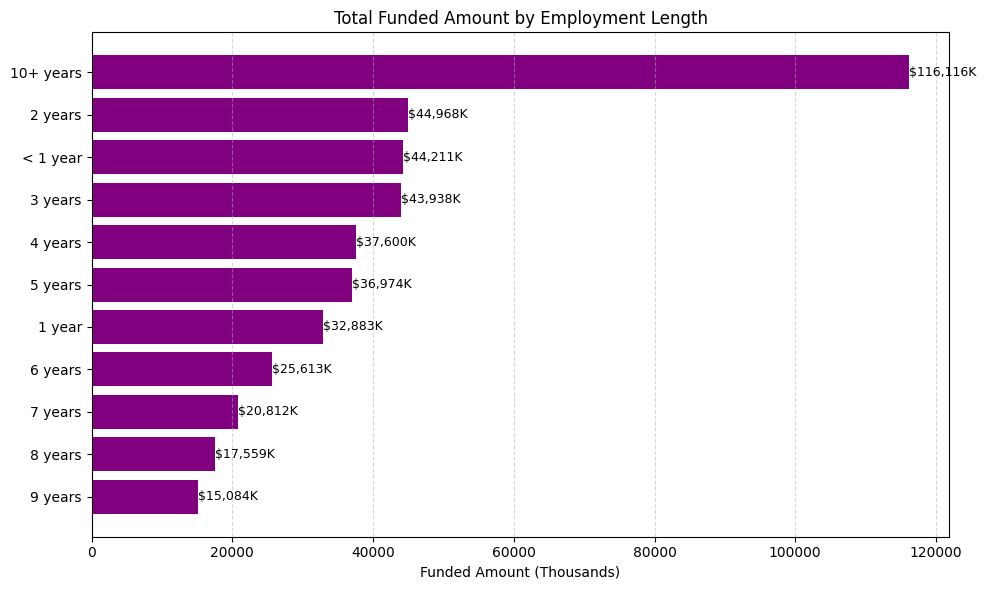

In [31]:
# Total Funded Amount (do the same for Total Loan Applications and Total Amount Received)
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars= plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5, bar.get_y()+ bar.get_height() / 2, f"${width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount (Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2.2.5. Loan Purpose Breakdown**

<function matplotlib.pyplot.show(close=None, block=None)>

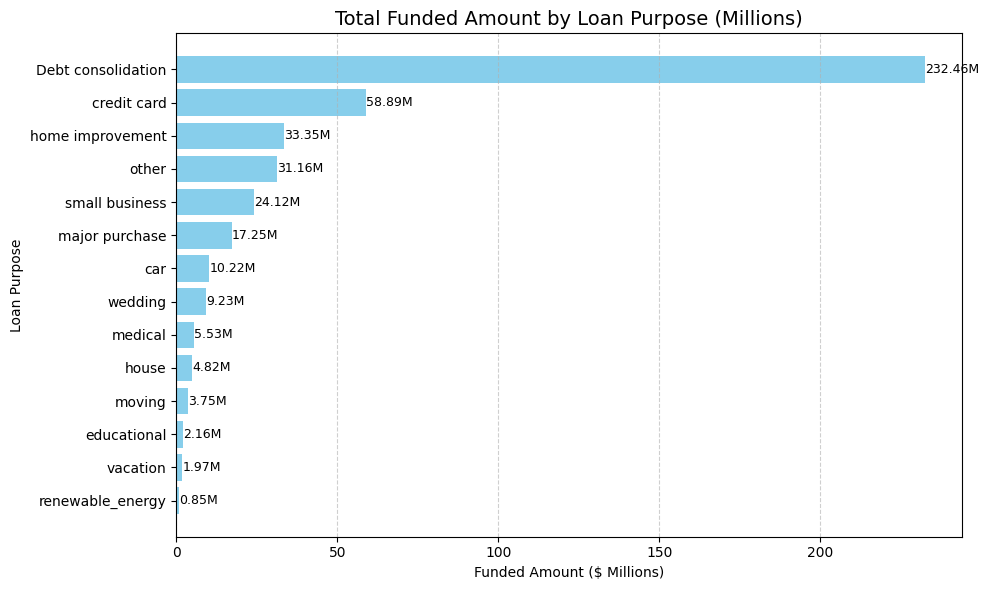

In [32]:
# Total Funded Amount (do the same for Total Loan Applications and Total Amount Received)
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
  width=bar.get_width()
  plt.text(width + 0.1, bar.get_y()+ bar.get_height()/2, f'{width:.2f}M', va='center', fontsize=9)
plt.title('Total Funded Amount by Loan Purpose (Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show

**2.2.6. Home Ownership Analysis**

In [33]:
# Total Funded Amount (do the same for Total Loan Applications and Total Amount Received)
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000008

fig = px.treemap(
  home_funding,
  path=['home_ownership'],
  values='loan_amount_millions',
  color='loan_amount_millions',
  color_continuous_scale='Blues',
  title='Total Funded Amount by Home Ownership ($ Millions)'
)
fig.show()